## Bit Coin Price Prediction using Time Series Analysis

In [1]:
!wget https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/Bitcoin_Historical_Data_Investing.com_India.csv

--2023-11-06 16:56:06--  https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/Bitcoin_Historical_Data_Investing.com_India.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265320 (259K) [text/plain]
Saving to: ‘Bitcoin_Historical_Data_Investing.com_India.csv’

Bitcoin_Historical_ 100%[===================>] 259.10K  1.20MB/s    in 0.2s    

2023-11-06 16:56:07 (1.20 MB/s) - ‘Bitcoin_Historical_Data_Investing.com_India.csv’ saved [265320/265320]



In [2]:
!wget https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/helper_functions.py

--2023-11-06 16:56:11--  https://raw.githubusercontent.com/vaghani04/ML_Bitcoin_price_prediction/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4395 (4.3K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.29K  --.-KB/s    in 0s      

2023-11-06 16:56:11 (64.6 MB/s) - ‘helper_functions.py’ saved [4395/4395]



## Importing time series with pandas

In [11]:
import pandas as pd

df = pd.read_csv('/content/Bitcoin_Historical_Data_Investing.com_India.csv',
                 parse_dates = ['Date'],
)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.sort_values(by="Date", ascending=True)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Price'] = df['Price'].str.replace(',', '').astype('float32')

df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-10-01,140.300003,141.9,144.4,139.4,9.57K,-1.13%
2013-10-02,123.000000,140.3,141.9,109.7,111.32K,-12.33%
2013-10-03,131.000000,123.0,132.0,120.1,35.27K,6.50%
2013-10-04,136.800003,131.0,139.8,128.5,18.51K,4.45%
2013-10-05,136.699997,136.8,138.0,135.3,5.00K,-0.09%


In [12]:
bitcoin_prices = pd.DataFrame(df['Price'])
bitcoin_prices.head()

,Price
Date,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,131.000000
2013-10-04,136.800003
2013-10-05,136.699997


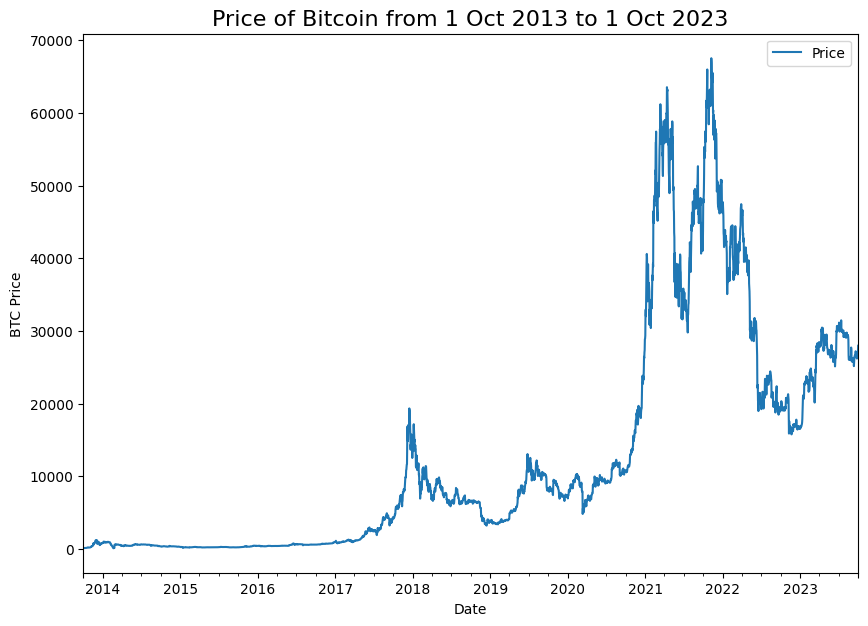

In [13]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 1 Oct 2023', fontsize=16)
plt.legend()

In [6]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([140.3, 123. , 131. , 136.8, 136.7, 137.8, 135.8, 136.5, 139.5,
        140.4], dtype=float32))

### Smoothing the time series curve

A moving-average model can be fit in the context of time-series analysis by smoothing the time series curve by computing the average of all data points in a fixed-length window.
This technique is known as Moving Average Smoothing and can be used for data preparation, feature engineering, and forecasting.

> 📖 **Resources:** https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [14]:
rolling = bitcoin_prices.rolling(window=3)
# rolling[:5]
rolling_mean = rolling.mean()
rolling_mean.head()

,Price
Date,
2013-10-01,NaN
2013-10-02,NaN
2013-10-03,131.433334
2013-10-04,130.266668
2013-10-05,134.833333


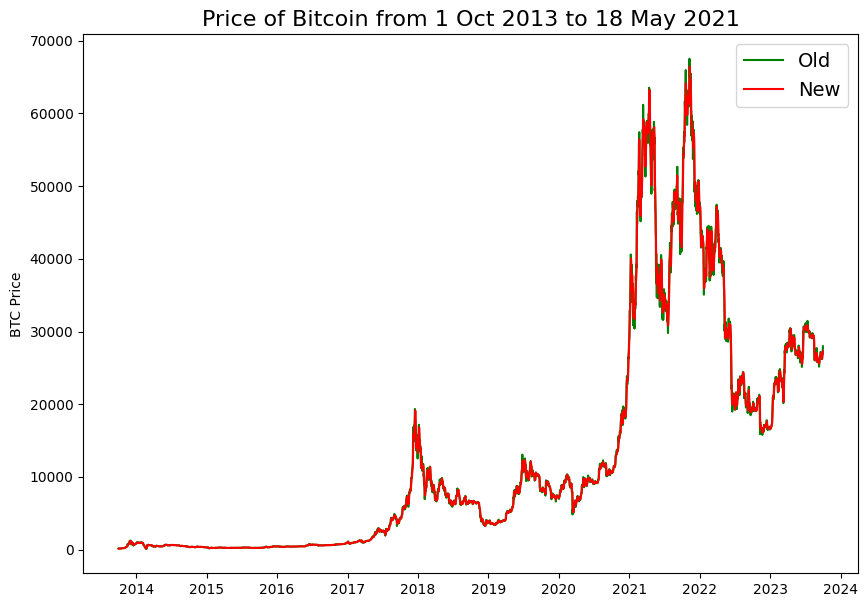

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps, bitcoin_prices, color='green', label='Old')
plt.plot(timesteps, rolling_mean, color='red', label='New')
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)

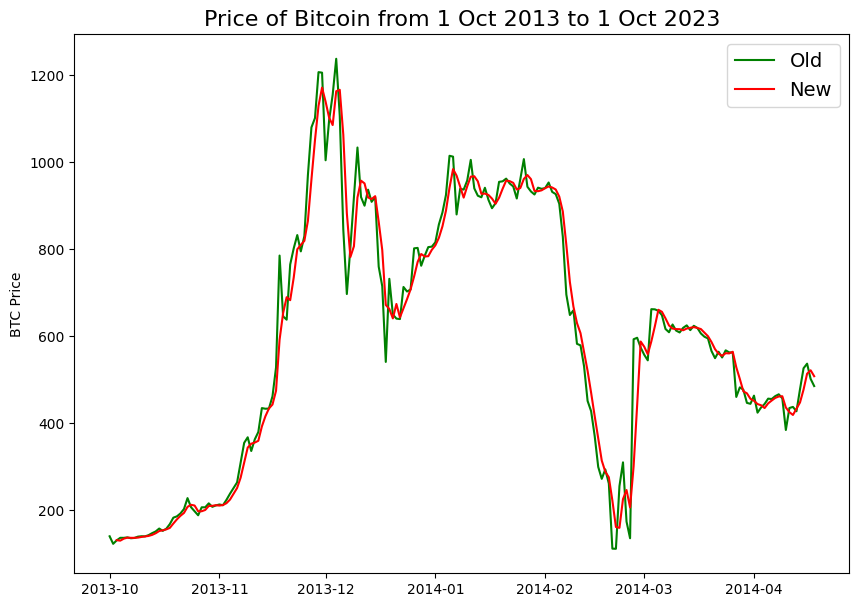

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps[:200], bitcoin_prices[:200], color='green', label='Old')
plt.plot(timesteps[:200], rolling_mean[:200], color='red', label='New')
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 1 Oct 2023', fontsize=16)
plt.legend(fontsize=14)

In [17]:
timesteps = rolling_mean.index.to_numpy()
prices = rolling_mean['Price'].to_numpy()

split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2922, 731, 2922, 731)

### Import some important functions from helper_functions.py

In [18]:
from helper_functions import plot_time_series, mean_absolute_scaled_error, get_labelled_windows, make_windows, make_train_test_splits, make_preds, evaluate_preds

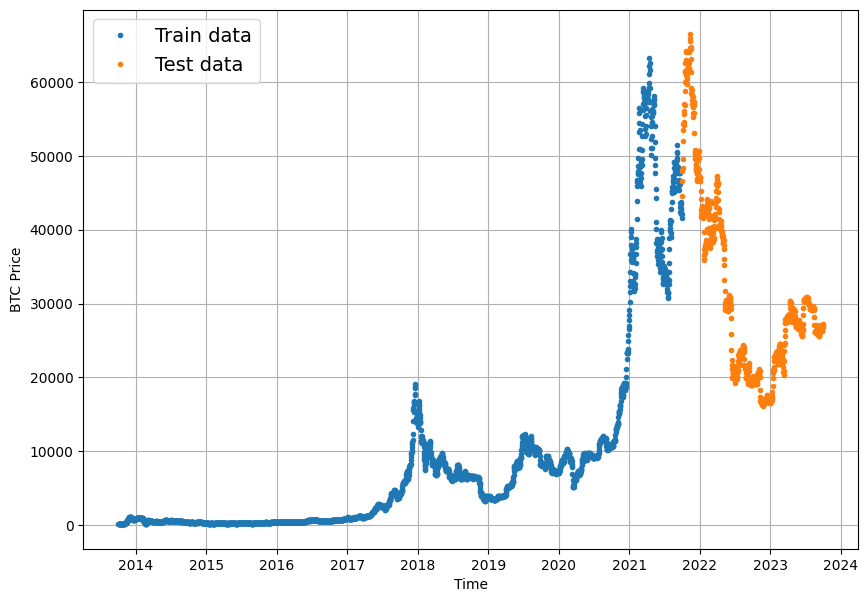

In [19]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

  * **horizon** = number of timesteps to predict into future
  * **window** = number of timesteps from past used to predict **horizon**

## Model 0: Naive forecast (baseline)

One of the most common baseline models for time series forecasting, the naive model (also called the [naive forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)), requires no training at all.

That's because all the naive model does is use the previous timestep value to predict the next timestep value.

$$\hat{y}_{t} = y_{t-1}$$

In an open system (like a stock market or crypto market), you'll often find beating the naive forecast with *any* kind of model is quite hard.

In [20]:
y_test[:10], y_test[-10:]

(array([44502.03385417, 46545.39973958, 48004.33333333, 48364.76692708,
        49632.234375  , 52006.60026042, 53525.46614583, 54340.59895833,
        54213.69921875, 54514.96614583]),
 array([26758.96679688, 26577.03320312, 26470.86653646, 26377.79947917,
        26257.69986979, 26295.89973958, 26535.86653646, 26766.16666667,
        26965.03320312, 27282.33333333]))

In [21]:
naive_forecast = y_test[:-1]  # Naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]

(array([44502.03385417, 46545.39973958, 48004.33333333, 48364.76692708,
        49632.234375  , 52006.60026042, 53525.46614583, 54340.59895833,
        54213.69921875, 54514.96614583]),
 array([26968.06640625, 26758.96679688, 26577.03320312, 26470.86653646,
        26377.79947917, 26257.69986979, 26295.89973958, 26535.86653646,
        26766.16666667, 26965.03320312]))

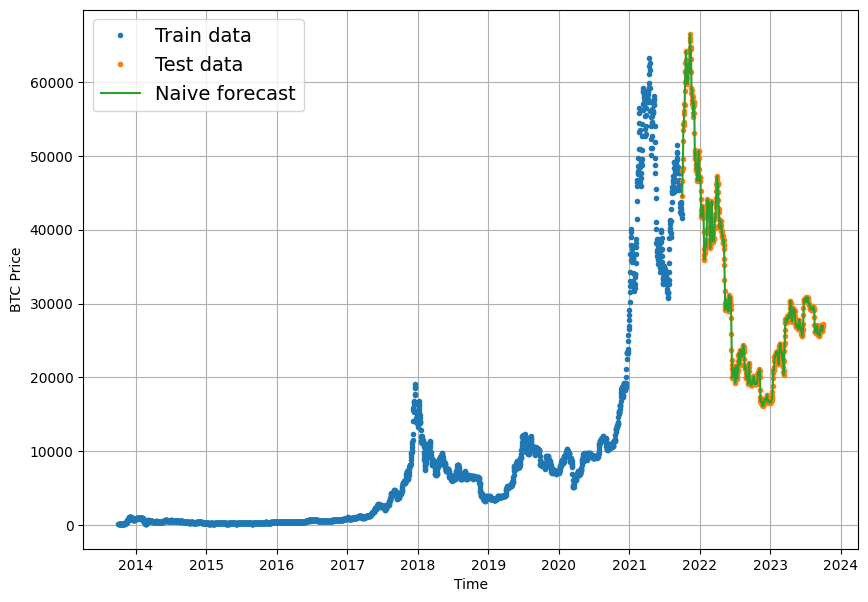

In [22]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

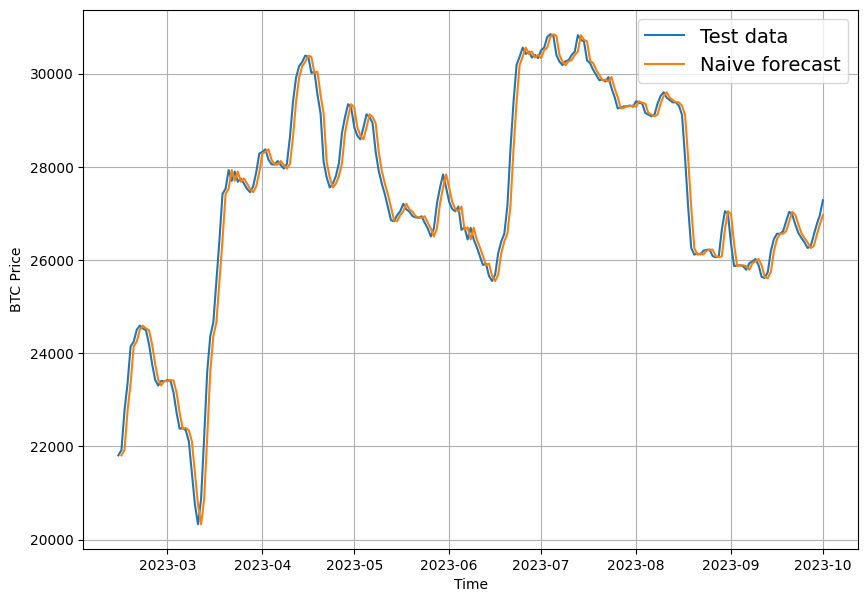

In [23]:
plt.figure(figsize=(10, 7))
offset = 500
plot_time_series(timesteps=X_test, values=y_test, start=offset, format='-', label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

## Evaluating a time series model

In [24]:
import tensorflow as tf

In [25]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 392.59882,
 'mse': 349755.78,
 'rmse': 591.40155,
 'mape': 1.2235622,
 'mase': 1.0058013}

Taking a look at the naive forecast's MAE, it seems on average each forecast is ~$392 different than the actual Bitcoin price.

In [26]:
tf.reduce_mean(y_test).numpy()

31007.885374362315

In [27]:
bitcoin_prices = rolling_mean.dropna()
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2920, 731, 2920, 731)

## Format Data Part 2: Windowing dataset

Windowing is a method to turn a time series dataset into **supervised learning problem**.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [28]:
print(f'We want to use: {prices[:7]} to predict this: {prices[7]}')

We want to use: [131.43333435 130.26666768 134.83333333 137.10000102 136.76666768
 136.70000203 137.26666768] to predict this: 138.79999796549478


In [29]:
HORIZON = 1
WINDOW_SIZE = 7

In [30]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")
test_window, test_label

Window: [1 2 3 4 5 6 7] -> Label: 8


(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

Now we need a way to make windows for an entire time series.

> 📖 **Resource:** The function created below has been adapted from Syafiq Kamarul Azman's article [*Fast and Robust Sliding Window Vectorization with NumPy*](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).

In [31]:
import numpy as np

In [32]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650]]), (3644, 8))


(3644, 3644)

In [33]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [131.43333435 130.26666768 134.83333333 137.10000102 136.76666768
 136.70000203 137.26666768] -> Label: [138.79999797]
Window: [130.26666768 134.83333333 137.10000102 136.76666768 136.70000203
 137.26666768 138.79999797] -> Label: [140.]
Window: [134.83333333 137.10000102 136.76666768 136.70000203 137.26666768
 138.79999797 140.        ] -> Label: [141.1333313]


## Turning windows into training and test sets


In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2915, 729, 2915, 729)

In [35]:
train_windows[:5], train_labels[:5]

(array([[131.43333435, 130.26666768, 134.83333333, 137.10000102,
         136.76666768, 136.70000203, 137.26666768],
        [130.26666768, 134.83333333, 137.10000102, 136.76666768,
         136.70000203, 137.26666768, 138.79999797],
        [134.83333333, 137.10000102, 136.76666768, 136.70000203,
         137.26666768, 138.79999797, 140.        ],
        [137.10000102, 136.76666768, 136.70000203, 137.26666768,
         138.79999797, 140.        , 141.1333313 ],
        [136.76666768, 136.70000203, 137.26666768, 138.79999797,
         140.        , 141.1333313 , 143.5       ]]),
 array([[138.79999797],
        [140.        ],
        [141.1333313 ],
        [143.5       ],
        [147.2666626 ]]))

## Make a modelling checkpoint


In [36]:
import os
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)


In [37]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
23/23 [==============================] - 6s 35ms/step - loss: 3297.4194 - mae: 3297.4194 - mse: 60337828.0000 - val_loss: 4758.6846 - val_mae: 4758.6846 - val_mse: 28412336.0000
Epoch 2/100
23/23 [==============================] - 0s 21ms/step - loss: 649.5925 - mae: 649.5925 - mse: 2205487.0000 - val_loss: 1607.6094 - val_mae: 1607.6094 - val_mse: 4310226.5000
Epoch 3/100
23/23 [==============================] - 1s 22ms/step - loss: 385.9531 - mae: 385.9531 - mse: 894693.3750 - val_loss: 1059.1478 - val_mae: 1059.1478 - val_mse: 2200645.0000
Epoch 4/100
23/23 [==============================] - 0s 21ms/step - loss: 328.2303 - mae: 328.2303 - mse: 637821.4375 - val_loss: 923.4810 - val_mae: 923.4810 - val_mse: 1716975.0000
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 314.3804 - mae: 314.3804 - mse: 580950.0000 - val_loss: 986.7239 - val_mae: 986.7239 - val_mse: 1852673.2500
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 

In [38]:
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 431.2448 - mae: 431.2448 - mse: 380993.2188


[431.2448425292969, 431.2448425292969, 380993.21875]

In [39]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 377.4366 - mae: 377.4366 - mse: 312117.1875


[377.4365539550781, 377.4365539550781, 312117.1875]

## Making forecasts with a model (on the test dataset)


In [40]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

23/23 [==============================] - 0s 2ms/step


(729,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([47465.96 , 48968.402, 48877.527, 49654.312, 52328.32 , 54277.883,
        55004.29 , 54358.785, 54243.13 , 55637.375], dtype=float32)>)

> 🔑 **Note:** With these outputs, our model isn't *forecasting* yet. It's only making predictions on the test dataset. Forecasting would involve a model making predictions into the future, however, the test dataset is only a pseudofuture.

In [42]:
tf.squeeze(test_labels).shape, model_1_preds.shape, test_labels.shape

(TensorShape([729]), TensorShape([729]), (729, 1))

In [43]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 377.43652,
 'mse': 312117.2,
 'rmse': 558.6745,
 'mape': 1.1690205,
 'mase': 0.970607}

In [44]:
naive_results

{'mae': 392.59882,
 'mse': 349755.78,
 'rmse': 591.40155,
 'mape': 1.2235622,
 'mase': 1.0058013}

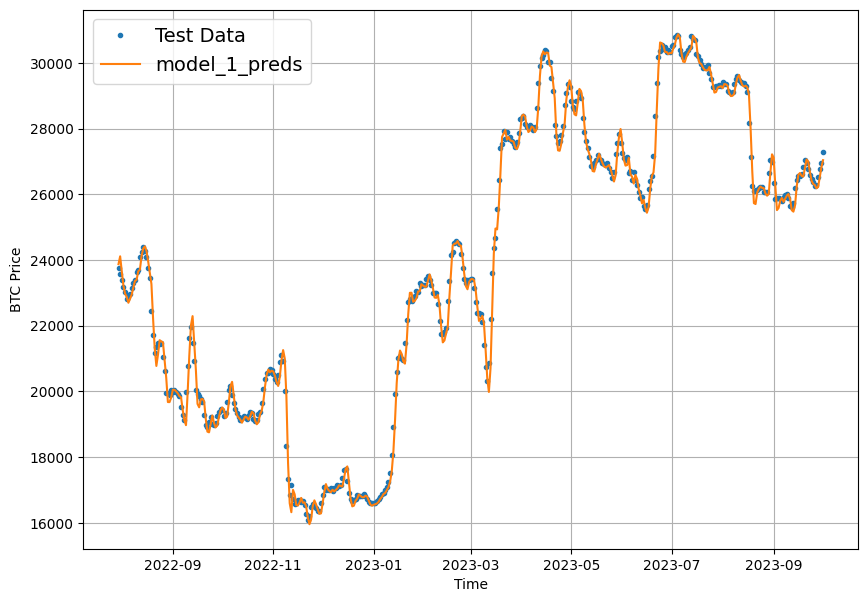

In [45]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='model_1_preds')

## Model 2: Dense (window = 30, horizon = 1)


In [46]:
HORIZON = 1
WINDOW_SIZE = 30

In [47]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]), array([[3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628,
        3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639,
        3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629,
        3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640,
        3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3620, 3621, 36

(3621, 3621)

In [48]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2896, 725, 2896, 725)

In [49]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [50]:
model_2.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 944.2285


944.2284545898438

In [51]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 426.0351


426.0351257324219

In [52]:
model_2_preds = make_preds(model_2, input_data=test_windows)

23/23 [==============================] - 0s 2ms/step


In [53]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 426.03513,
 'mse': 392511.97,
 'rmse': 626.50775,
 'mape': 1.3439714,
 'mase': 1.1112344}

In [54]:
model_1_results

{'mae': 377.43652,
 'mse': 312117.2,
 'rmse': 558.6745,
 'mape': 1.1690205,
 'mase': 0.970607}

It looks like `model_2` performs worse than the naive model as well as `model_1`!

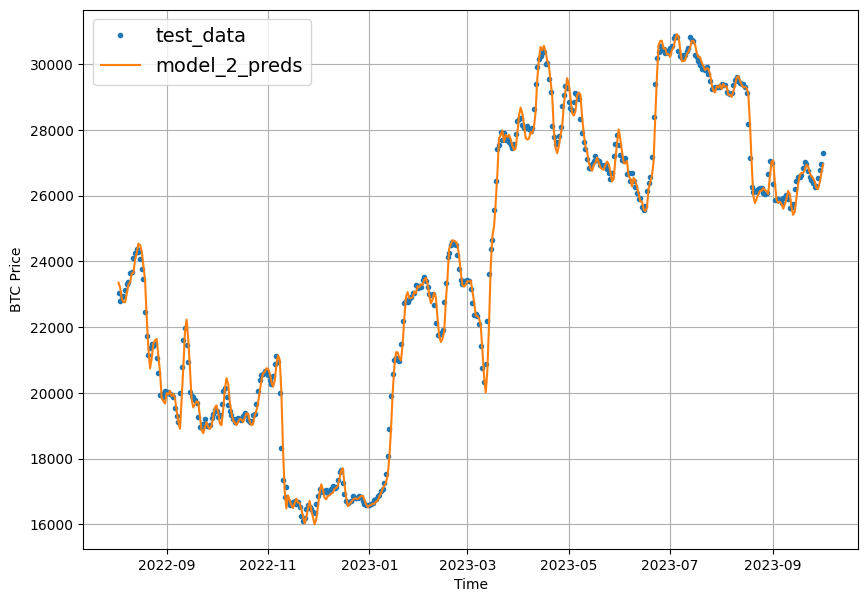

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)



In [56]:
HORIZON = 7
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes:
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]]), array([[3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622,
        3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633,
        3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644,
        3645, 3646, 3647, 3648],
       [3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623,
 

(3615, 3615)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
# len(train_windows), len(test_windows), len(train_labels), len(test_labels)

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [59]:
model_3.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 1265.8083


1265.808349609375

In [60]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 1253.6230


1253.623046875

In this case, the error will be higher because we're predicting 7 steps at a time.

In [61]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[45772.715, 45797.062, 45977.016, 45384.887, 46054.895, 44403.656,
        45177.23 ],
       [47912.156, 47849.21 , 48076.36 , 47294.082, 48096.65 , 46452.094,
        47249.008],
       [48090.754, 48456.49 , 48784.598, 47870.28 , 48418.074, 46943.05 ,
        48013.703],
       [48675.938, 48708.773, 49719.723, 48895.94 , 48731.57 , 47614.664,
        48870.707],
       [50852.695, 49860.613, 52242.598, 50538.684, 50616.316, 49811.47 ,
        50585.543]], dtype=float32)>

In [62]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1253.623,
 'mse': 3592128.2,
 'rmse': 1433.3751,
 'mape': 4.0298896,
 'mase': 3.2447796}

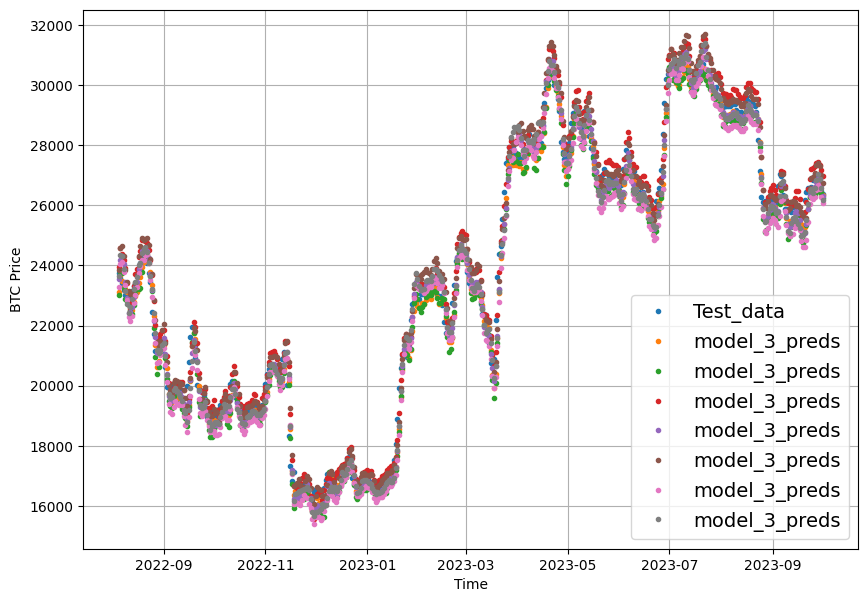

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

we can fix this by aggregating our model's predictions.

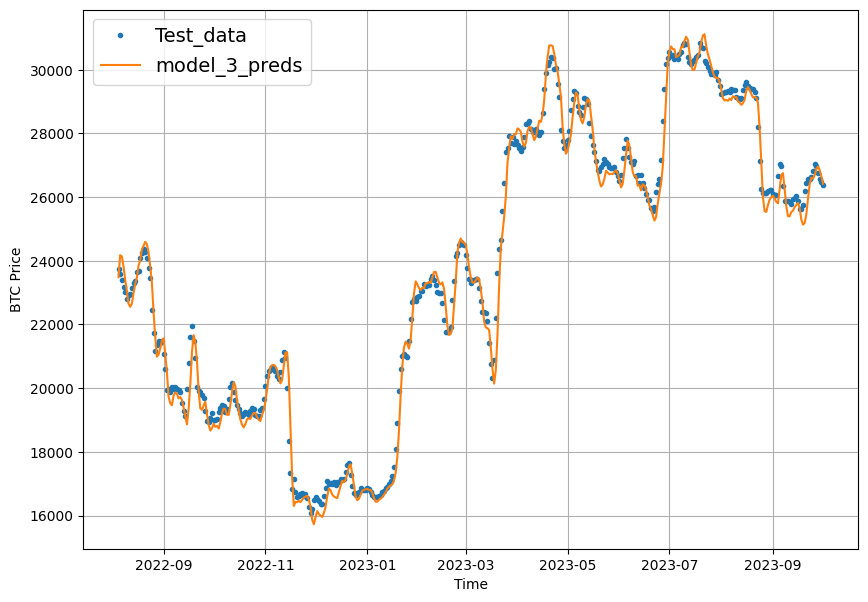

In [64]:
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="model_3_preds")

### Which of our models is performing best so far?

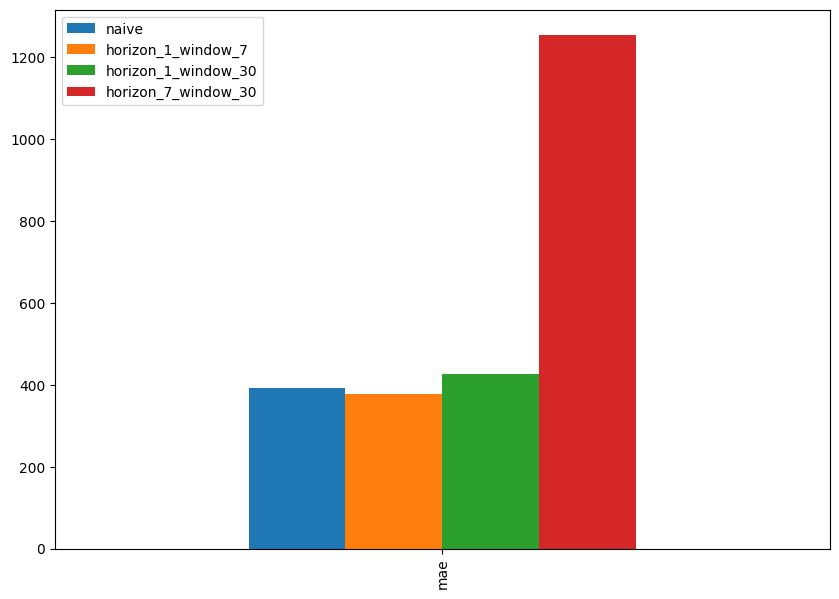

In [65]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

> 🔑 **Note:** why are the naive results so good? One of the reasons could be due the presence of **autocorrelation** in the data. If a time series has **autocorrelation** it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naive model will often get fairly good results.

> **Autocorrelation:** Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

## Model 4: Conv1D

Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

In [67]:
HORIZON = 1
WINDOW_SIZE = 7

In [68]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650]]), (3644, 8))


(3644, 3644)

In [69]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2915, 2915, 729, 729)

In [70]:
train_windows[0].shape

(7,)

In [71]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([131.43333435, 130.26666768, 134.83333333, 137.10000102,
       136.76666768, 136.70000203, 137.26666768])>

In [72]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps

In [73]:
print(f'Original shape: {x.shape}')
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[131.43333]
 [130.26666]
 [134.83333]
 [137.1    ]
 [136.76666]
 [136.7    ]
 [137.26666]]


In [74]:
x.numpy()

array([131.43333435, 130.26666768, 134.83333333, 137.10000102,
       136.76666768, 136.70000203, 137.26666768])

In [75]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=256, kernel_size=5, strides=2, padding="same", activation="relu"),
  layers.Conv1D(filters=256, kernel_size=5, strides=2, padding="same", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

The Lambda layer appears the same as any other regular layer.

In [81]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            9216      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 256)            327936    
                                                                 
 dense_6 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 337409 (1.29 MB)
Trainable params: 337409 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 706.7593


706.7593383789062

In [84]:
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 331.7992


331.7992248535156

In [85]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47849.254, 48906.855, 48789.246, 49942.   , 52935.324, 54563.95 ,
       54844.28 , 54318.24 , 54462.37 , 56079.23 ], dtype=float32)>

In [86]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 331.79922,
 'mse': 244046.64,
 'rmse': 494.01077,
 'mape': 1.0231231,
 'mase': 0.85324717}

## Model 5: RNN (LSTM)

we can also use a recurrent neural network to model our sequential time series data.








In [87]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
print(x.shape)

x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
print(x.shape)

x = layers.Dense(32, activation="relu")(x)

output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

(None, 1, 7)
(None, 128)


In [88]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

23/23 [==============================] - 1s 4ms/step - loss: 370.4600


370.4599914550781

In [89]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

23/23 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47441.715, 48851.324, 48778.555, 49653.63 , 52297.086, 54250.023,
       54895.805, 54325.574, 54299.965, 55677.234], dtype=float32)>

In [90]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 370.45996,
 'mse': 306228.25,
 'rmse': 553.37897,
 'mape': 1.1462685,
 'mase': 0.9526662}

it seems even with an LSTM-powered RNN we weren't able to beat our naive models results.

> 🔑 **Note:** because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results.


## Make a multivariate time series

What would be better is if we passed our model something related to Bitcoin

We could try to see if the Bitcoin block reward size adds any predictive power to our model(s).

In [91]:
bitcoin_prices.head()

,Price
Date,
2013-10-03,131.433334
2013-10-04,130.266668
2013-10-05,134.833333
2013-10-06,137.100001
2013-10-07,136.766668


add another feature column, the block reward size.

The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | - (expected 2024) |
| 1.5625 | - (expected 2028) |

In [92]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [93]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1010, 2412)

Now we can add another feature to our dataset `block_reward` (this gets lower over time so it may lead to increasing prices of Bitcoin).

In [94]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-03,131.433334,25
2013-10-04,130.266668,25
2013-10-05,134.833333,25
2013-10-06,137.100001,25
2013-10-07,136.766668,25


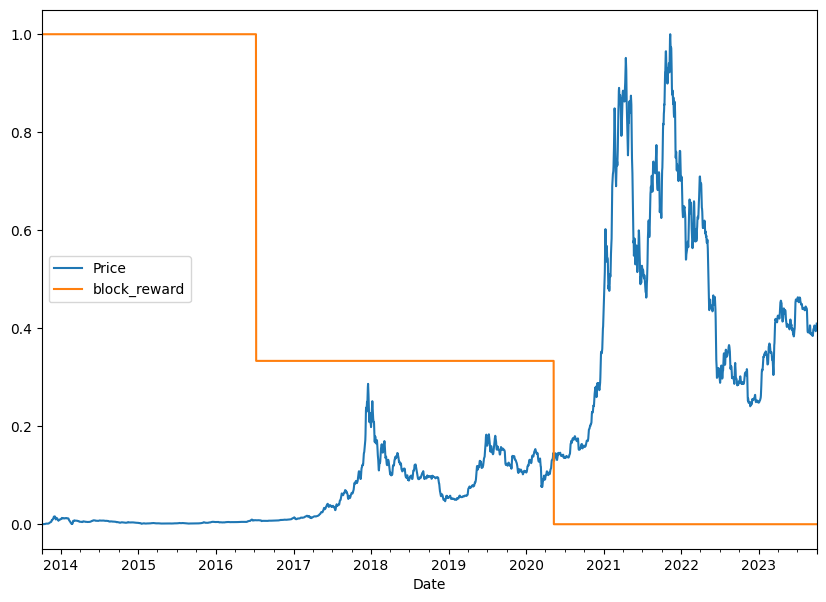

In [95]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we used some custom made functions to window our **univariate** time series.

we can also use the `pandas.DataFrame.shift()` method to create a windowed **multivariate** time series.

In [96]:
HORIZON = 1
WINDOW_SIZE = 7

In [97]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-03,131.433334,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-04,130.266668,25,131.433334,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-05,134.833333,25,130.266668,131.433334,NaN,NaN,NaN,NaN,NaN
2013-10-06,137.100001,25,134.833333,130.266668,131.433334,NaN,NaN,NaN,NaN
2013-10-07,136.766668,25,137.100001,134.833333,130.266668,131.433334,NaN,NaN,NaN
2013-10-08,136.700002,25,136.766668,137.100001,134.833333,130.266668,131.433334,NaN,NaN
2013-10-09,137.266668,25,136.700002,136.766668,137.100001,134.833333,130.266668,131.433334,NaN
2013-10-10,138.799998,25,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668,131.433334
2013-10-11,140.000000,25,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668



```
Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON

[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [98]:
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-10,25.0,137.266663,136.699997,136.766663,137.100006,134.833328,130.266663,131.433334
2013-10-11,25.0,138.800003,137.266663,136.699997,136.766663,137.100006,134.833328,130.266663
2013-10-12,25.0,140.000000,138.800003,137.266663,136.699997,136.766663,137.100006,134.833328
2013-10-13,25.0,141.133331,140.000000,138.800003,137.266663,136.699997,136.766663,137.100006
2013-10-14,25.0,143.500000,141.133331,140.000000,138.800003,137.266663,136.699997,136.766663


In [99]:
y.head()

Date
2013-10-10    138.800003
2013-10-11    140.000000
2013-10-12    141.133331
2013-10-13    143.500000
2013-10-14    147.266663
Name: Price, dtype: float32

In [100]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2915, 2915, 729, 729)

## Model 6: Dense (multivariate time series)

By replicating the `model_1` architecture we'll be able to see whether or not adding the block reward feature improves from model performance.

In [101]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [102]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 315.8935


315.89349365234375

In [103]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47909.89 , 48838.457, 48613.35 , 49951.387, 53040.31 , 54507.03 ,
       54674.336, 54109.258, 54393.82 , 56120.27 ], dtype=float32)>

In [104]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 315.89346,
 'mse': 223547.55,
 'rmse': 472.80814,
 'mape': 0.97271454,
 'mase': 0.81234425}

In [105]:
model_1_results

{'mae': 377.43652,
 'mse': 312117.2,
 'rmse': 558.6745,
 'mape': 1.1690205,
 'mase': 0.970607}

It looks like the adding in the block reward may have helped our model slightly.


## Model 7: N-BEATS algorithm

One of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm](https://arxiv.org/pdf/1905.10437.pdf) does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

we're going to be replicating the **generic architecture** of the N-BEATS algorithm (see section 3.3 of the N-BEATS paper).

* Creating a custom layer for the `NBeatsBlock` by subclassing `tf.keras.layers.Layer`



### Building and testing an N-BEATS block layer

In [106]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [107]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [108]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [109]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.20655876 -0.97152436 -0.49576244 -0.03780507 -0.36043486 -0.2650716
  0.04473387]
Forecast: 0.09305226802825928


### Preparing data for the N-BEATS algorithm using `tf.data`

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the `tf.data` API.

In [110]:
HORIZON = 1
WINDOW_SIZE = 7

In [111]:
bitcoin_prices.head()

,Price
Date,
2013-10-03,131.433334
2013-10-04,130.266668
2013-10-05,134.833333
2013-10-06,137.100001
2013-10-07,136.766668


In [112]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-10,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668,131.433334
2013-10-11,140.000000,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333,130.266668
2013-10-12,141.133331,140.000000,138.799998,137.266668,136.700002,136.766668,137.100001,134.833333
2013-10-13,143.500000,141.133331,140.000000,138.799998,137.266668,136.700002,136.766668,137.100001
2013-10-14,147.266663,143.500000,141.133331,140.000000,138.799998,137.266668,136.700002,136.766668


In [113]:
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2915, 2915, 729, 729)

Now let's convert them into TensorFlow `tf.data.Dataset`'s to ensure they run as fast as possible while training.

In [114]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Data prepared! Notice the input shape for the features `(None, 7)`, the `None` leaves space for the batch size where as the `7` represents the `WINDOW_SIZE`.


### Setting up hyperparameters for N-BEATS algorithm

In [115]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS **double residual stacking** (section 3.2 of the N-BEATS paper) possible:
* `tf.keras.layers.subtract(inputs)` - subtracts list of input tensors from each other
* `tf.keras.layers.add(inputs)` - adds list of input tensors to each other

In [116]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


N-BEATS architecture uses residual connections.

> What is a residual connection?

A **residual connection** (also called skip connections) involves a deeper neural network layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:
* Subtract the backcast outputs from a previous block from the backcast inputs to the current block
* Add the forecast outputs from all blocks together in a stack

> What are the benefits of residual connections?

In practice, residual connections have been beneficial for training deeper models (N-BEATS reaches ~150 layers, also see "These approaches provide clear advantages in improving the trainability of deep architectures" in section 3.2 of the N-BEATS paper).

It's thought that they help avoid the problem of [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem) (patterns learned by a neural network not being passed through to deeper layers).



### Building, compiling and fitting the N-BEATS algorithm


In [117]:
 %%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

for i, _ in enumerate(range(N_STACKS-1)):

  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 597: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1317: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1417: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 5min 50s, sys: 9.41 s, total: 6min
Wall time: 6min 56s


In [118]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 32ms/step - loss: 259.6507 - mae: 259.6507 - mse: 159958.4688


[259.6507263183594, 259.6507263183594, 159958.46875]

In [119]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47926.715, 48648.184, 48802.367, 50396.977, 54090.47 , 54328.82 ,
       54528.03 , 54178.258, 54645.273, 56851.24 ], dtype=float32)>

In [120]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 259.65073,
 'mse': 159958.47,
 'rmse': 399.94806,
 'mape': 0.80953467,
 'mase': 0.66771173}

### Plotting the N-BEATS architecture we've created

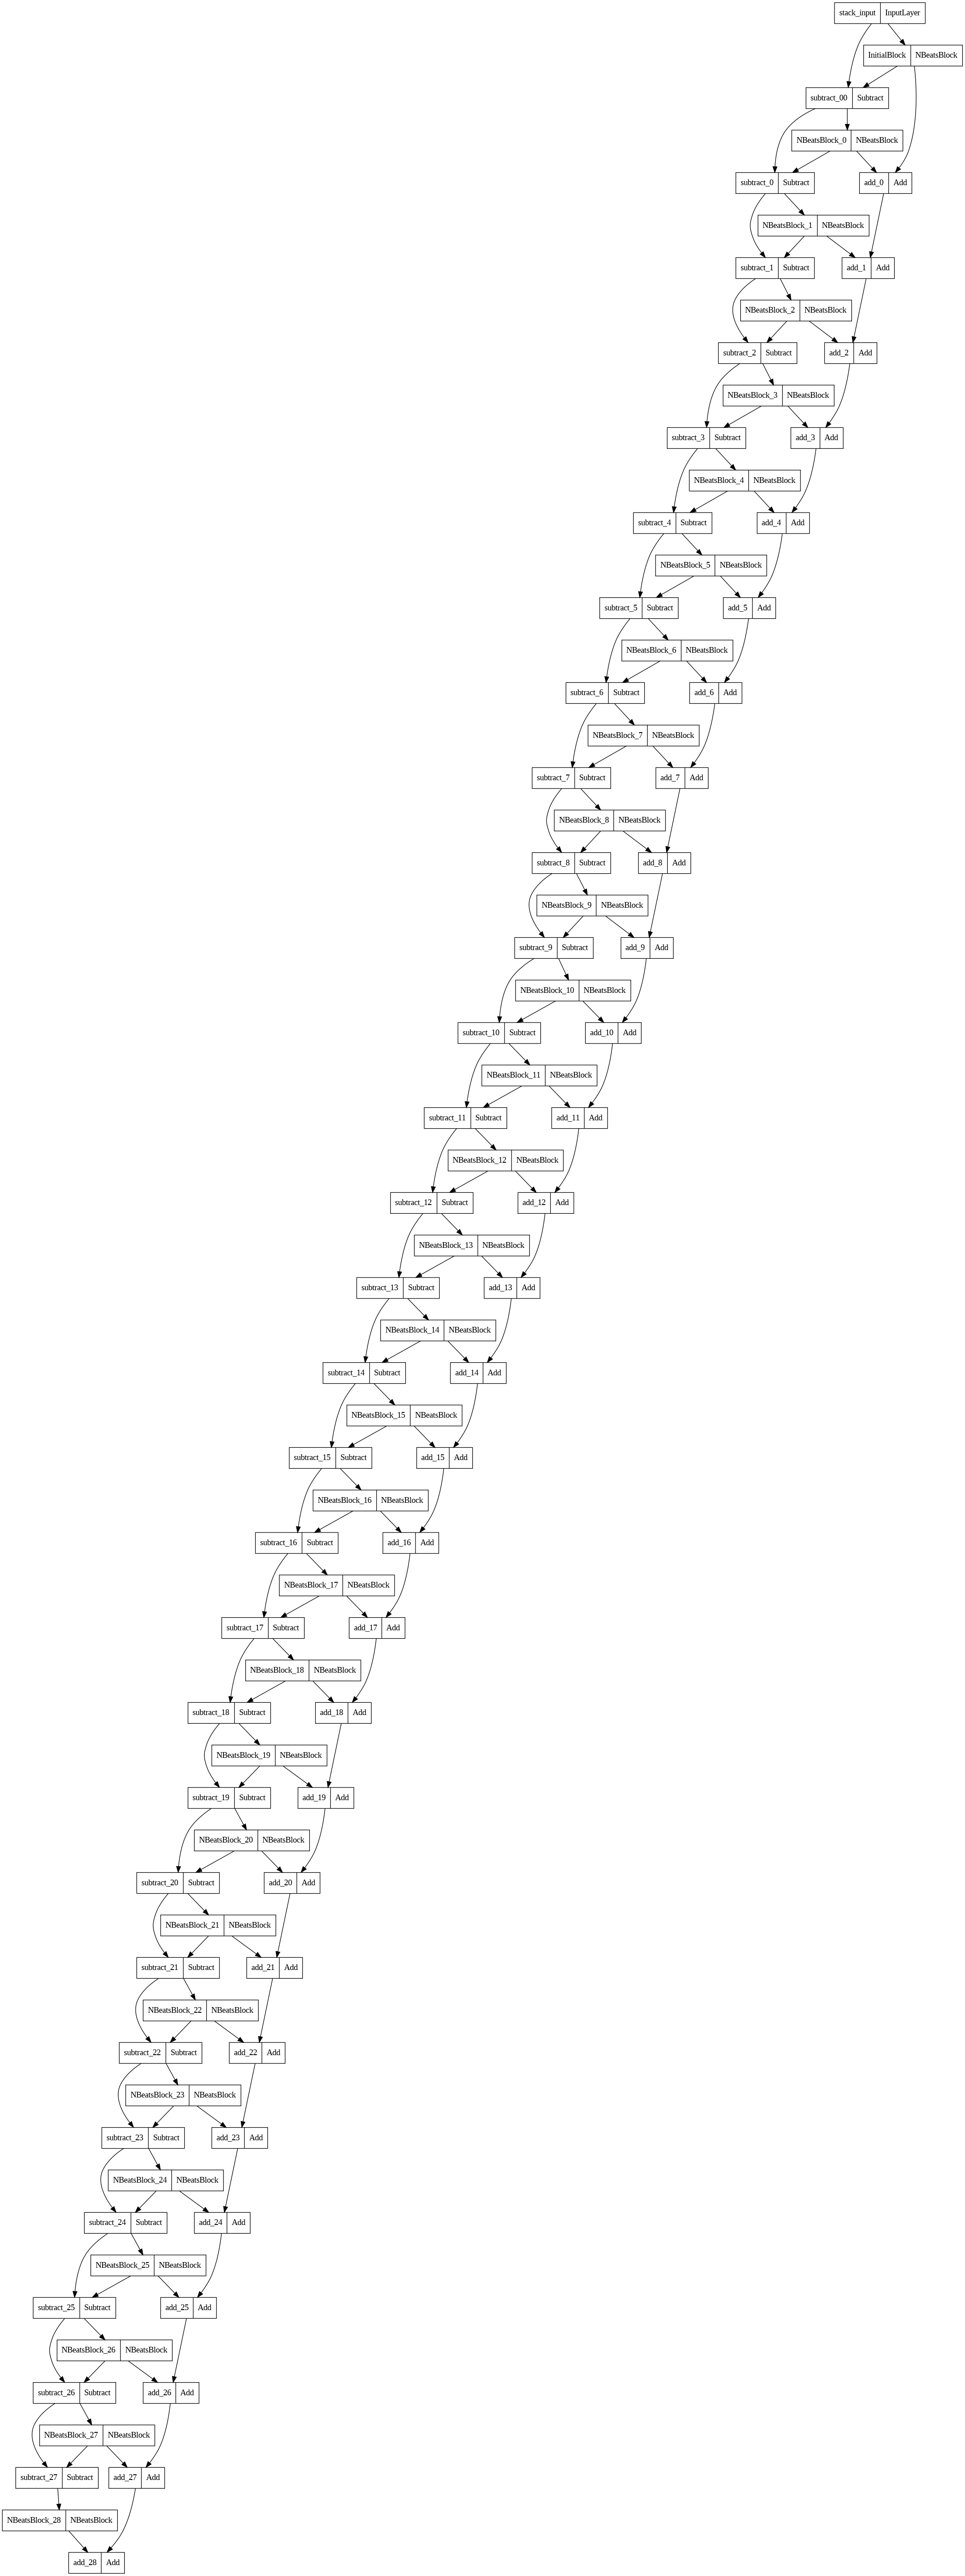

In [121]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An **ensemble** involves training and combining multiple different models on the same problem.

To create our ensemble models we're going to be using a combination of:
* Different loss functions (MAE, MSE, MAPE)
* Randomly initialized models



### Constructing and fitting an ensemble of models (using different loss functions)

In [122]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

      ensemble_models.append(model)

  return ensemble_models

> 🔑 **Note:** With ensembles, you'll generally find more total models means better performance. However, this comes with the tradeoff of having to train more models (longer training time) and make predictions with more models (longer prediction time).



In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 130: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 987: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 976: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 161: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 553: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 820: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 151: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae fo


### Making predictions with an ensemble model

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [133]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 289.26154,
 'mse': 189009.2,
 'rmse': 434.7519,
 'mape': 0.89531,
 'mase': 0.7438582}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

If a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD?

Knowing the range of values a model is predicting may help you make better decisions for your forecasts.

These kind of prediction ranges are called **prediction intervals** or **uncertainty estimates**. And they're often as important as the forecast itself.

Why?

Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.


> 🔑 **Note:** Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian

## Model 9: Train a model on the full historical data to make predictions into future

To make predictions into the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

Why use the full dataset?

Previously, we split our data into training and test sets to evaluate how our model did on pseudo-future data (the test set).

But since the goal of a forecasting model is to predict values into the actual-future, we won't be using a test set.

> 🔑 **Note:** Forecasting models need to be retrained every time a forecast is made. Why? Because if Bitcoin prices are updated daily and you predict the price for tomorrow. Your model is only really valid for one day. When a new price comes out (e.g. the next day), you'll have to retrain your model to incorporate that new price to predict the next forecast.

In [ ]:
bitcoin_prices_windowed.head()

In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [132]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions on the future

In [134]:
INTO_FUTURE = 14

In [135]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

Nice! Time to bring BitPredict 💰📈 to life and make future forecasts of the price of Bitcoin.

> 🛠 **Exercise:** In terms of a forecasting model, what might another approach to our `make_future_forecasts()` function? Recall, that for making forecasts, you need to retrain a model each time you want to generate a new prediction.
>
> So perhaps you could try to: make a prediction (one timestep into the future), retrain a model with this new prediction appended to the data, make a prediction, append the prediction, retrain a model... etc.
>
> As it is, the `make_future_forecasts()` function skips the retraining of a model part.

In [136]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 54ms/step
Predicting on: 
 [26377.79947917 26257.69986979 26295.89973958 26535.86653646
 26766.16666667 26965.03320312 27282.33333333] -> Prediction: 26386.052734375

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [26257.69986979 26295.89973958 26535.86653646 26766.16666667
 26965.03320312 27282.33333333 26386.05273438] -> Prediction: 26431.205078125

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26295.89973958 26535.86653646 26766.16666667 26965.03320312
 27282.33333333 26386.05273438 26431.20507812] -> Prediction: 26615.1953125

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26535.86653646 26766.16666667 26965.03320312 27282.33333333
 26386.05273438 26431.20507812 26615.1953125 ] -> Prediction: 26817.462890625

1/1 [==============================] - 0s 17ms/step
Predicting on: 
 [26766.16666667 26965.03320312 27282.33333333 26386.05273438
 26431.20507812 26615.1953125  26817

In [137]:
future_forecast[:10]

[26386.053,
 26431.205,
 26615.195,
 26817.463,
 27123.1,
 27154.143,
 26977.197,
 26531.361,
 26691.082,
 26929.607]

### Plot future forecasts

In [138]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [139]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2023-10-01 00:00:00')

In [140]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05',
       '2023-10-06', '2023-10-07', '2023-10-08', '2023-10-09',
       '2023-10-10', '2023-10-11', '2023-10-12', '2023-10-13',
       '2023-10-14', '2023-10-15'], dtype='datetime64[D]')

In [141]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, prices[-1])
next_time_steps, future_forecast

(array(['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04',
        '2023-10-05', '2023-10-06', '2023-10-07', '2023-10-08',
        '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-12',
        '2023-10-13', '2023-10-14', '2023-10-15'], dtype='datetime64[D]'),
 array([27282.334, 26386.053, 26431.205, 26615.195, 26817.463, 27123.1  ,
        27154.143, 26977.197, 26531.361, 26691.082, 26929.607, 27142.656,
        27301.049, 27139.508, 26896.451], dtype=float32))

In [142]:
next_time_steps.shape, future_forecast.shape

((15,), (15,))

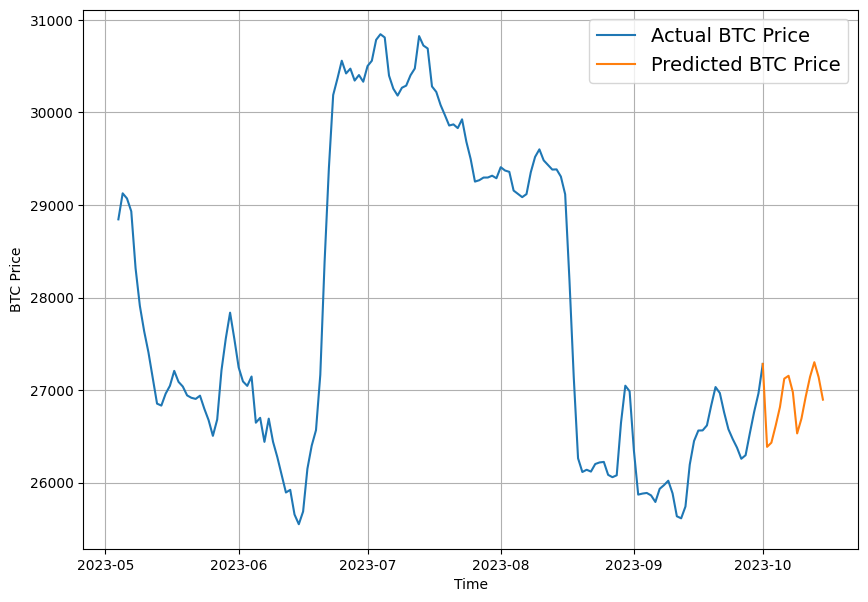

In [143]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, prices, start=3500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem)

The **turkey problem** is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

Let's get specific and see how the turkey problem effects us modelling the historical and future price of Bitcoin.

To do so, we're going to manufacture a highly unlikely data point into the historical price of Bitcoin, the price falling 100x in one day.

In [144]:
btc_price_turkey = prices.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [145]:
btc_price_turkey[-10:]

array([26758.96679688, 26577.03320312, 26470.86653646, 26377.79947917,
       26257.69986979, 26295.89973958, 26535.86653646, 26766.16666667,
       26965.03320312,   272.82333333])

In [146]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2023-09-22T00:00:00.000000000', '2023-09-23T00:00:00.000000000',
       '2023-09-24T00:00:00.000000000', '2023-09-25T00:00:00.000000000',
       '2023-09-26T00:00:00.000000000', '2023-09-27T00:00:00.000000000',
       '2023-09-28T00:00:00.000000000', '2023-09-29T00:00:00.000000000',
       '2023-09-30T00:00:00.000000000', '2023-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

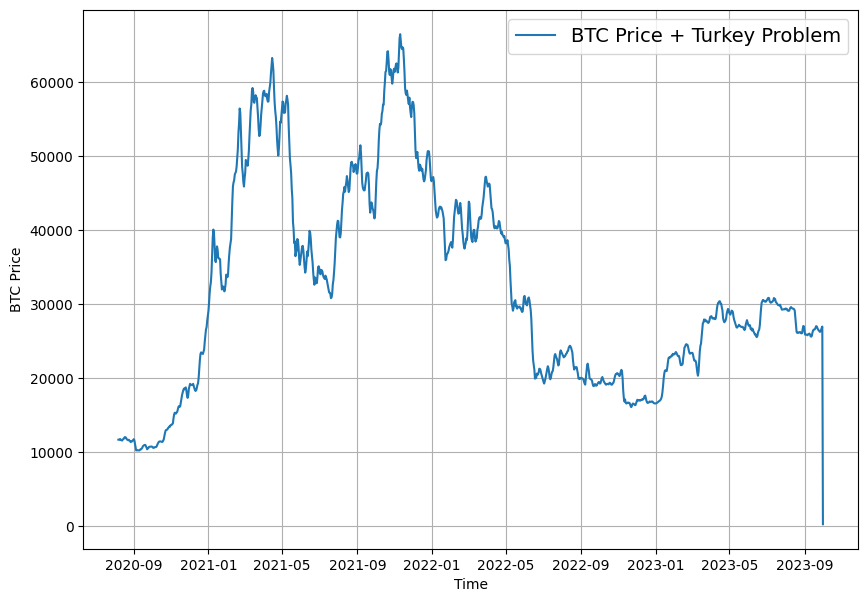

In [147]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [148]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes:
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648],
       [3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649],
       [3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650]]), (3644, 8))


(2915, 729, 2915, 729)

### Building a turkey model (model to predict on turkey data)

In [149]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [150]:
turkey_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 383.6922


383.6921691894531

In [151]:
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 358.2665


358.2664794921875

In [152]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

23/23 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([47687.65 , 48789.082, 48561.945, 50009.043, 52985.402, 54465.46 ,
       54789.97 , 54149.02 , 54512.527, 56128.81 ], dtype=float32)>

In [153]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 13213.278,
 'mse': 302260860.0,
 'rmse': 16595.918,
 'mape': 60.330536,
 'mase': 31.083057}

In [154]:
model_1_results

{'mae': 377.43652,
 'mse': 312117.2,
 'rmse': 558.6745,
 'mape': 1.1690205,
 'mase': 0.970607}

By changing just one value, the `turkey_model` MAE increases almost 30x over `model_1`.

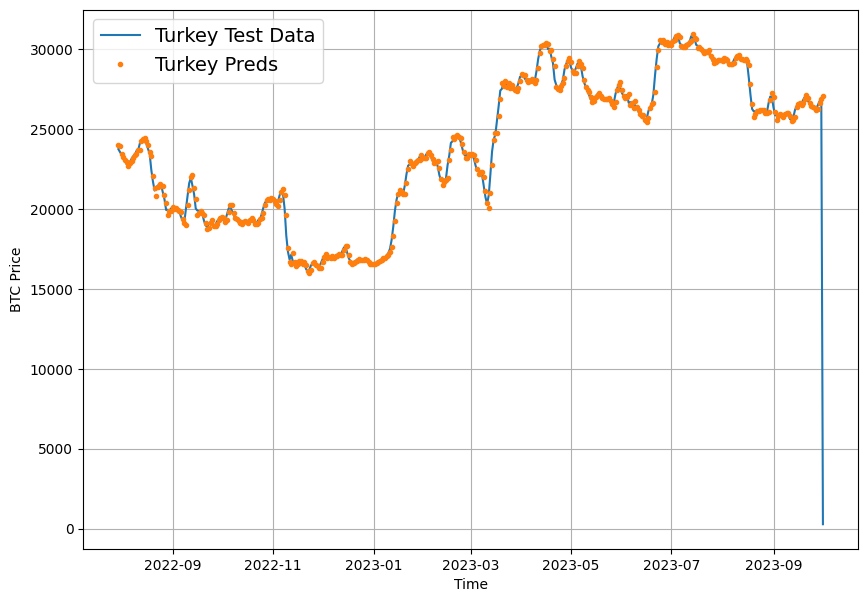

In [155]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], values=btc_price_turkey[-len(y_test):], format="-", label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], values=turkey_preds, label="Turkey Preds", start=offset);

## Compare Models

In [157]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,392.598816,3.497558e+05,591.401550,1.223562,1.005801
model_1_dense_w7_h1,377.436523,3.121172e+05,558.674500,1.169021,0.970607
model_2_dense_w30_h1,426.035126,3.925120e+05,626.507751,1.343971,1.111234
model_3_dense_w30_h7,1253.623047,3.592128e+06,1433.375122,4.029890,3.244780
model_4_CONV1D,331.799225,2.440466e+05,494.010773,1.023123,0.853247
model_5_LSTM,370.459961,3.062282e+05,553.378967,1.146268,0.952666
model_6_multivariate,315.893463,2.235475e+05,472.808136,0.972715,0.812344
model_8_NBEATs,259.650726,1.599585e+05,399.948059,0.809535,0.667712
model_9_ensemble,289.261536,1.890092e+05,434.751892,0.895310,0.743858
model_10_turkey,13213.278320,3.022609e+08,16595.917969,60.330536,31.083057


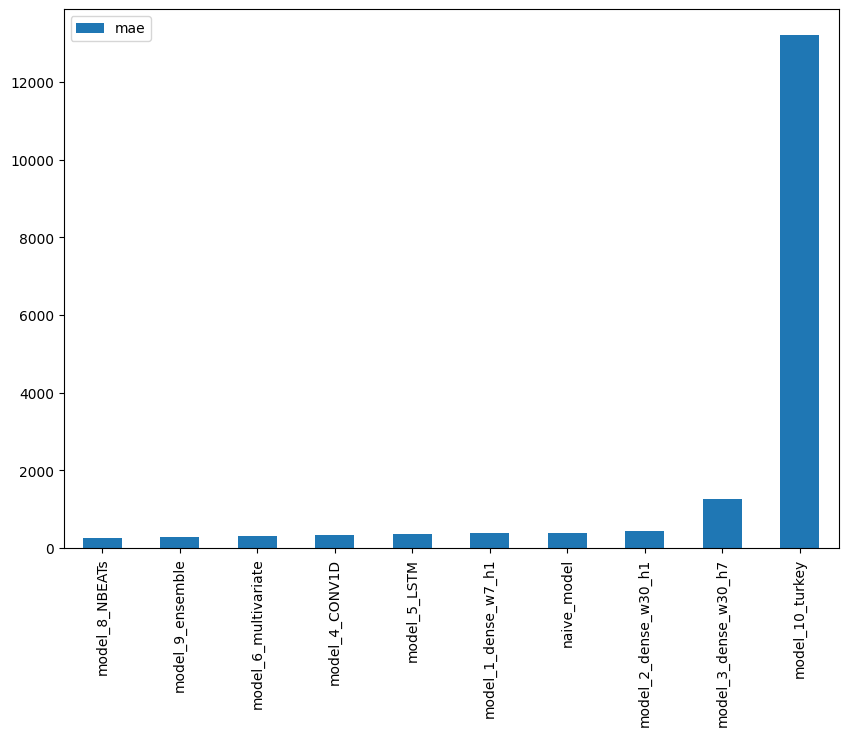

In [158]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

In [ ]:
# --------------------------------------------------------------------------- END ----------------------------------------------------------------------------------------------